# Capstone Final Project
This report explores U.S. population growth in various cities and regions. I will look to see which regions are growing the most and possible reasons for the increase in population. I will suggesst possible venues an interested entrepreneur can start in these areas. This is the final project for the IBM Data Science Certification course.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Get the Dataset
_https://public.opendatasoft.com/explore/dataset/1000-largest-us-cities-by-population-with-geographic-coordinates/export/?sort=-rank_

In [2]:
usa = pd.read_csv('1000-largest-us-cities-by-population-with-geographic-coordinates.csv', sep = ';')
usa.head()

,City,Rank,State,Growth From 2000 to 2013,Population,Coordinates
0,Marysville,552,Washington,115.7,63269,"48.0517637,-122.1770818"
1,Perris,466,California,98.7,72326,"33.7825194,-117.2286478"
2,Cleveland,48,Ohio,-18.1,390113,"41.49932,-81.6943605"
3,Worcester,129,Massachusetts,5.8,182544,"42.2625932,-71.8022934"
4,Columbia,192,South Carolina,11.7,133358,"34.0007104,-81.0348144"


## Data Cleaning

### Split Coodinates into Latitude and Longitude

In [3]:
usa['Latitude'] = usa['Coordinates'].str.split(',', n =1, expand = True)[0]
usa['Longitude'] = usa['Coordinates'].str.split(',', n =1, expand = True)[1]
usa.drop('Coordinates', axis = 1, inplace = True)

### Convert Latitude and Longitude into Floats

In [4]:
usa['Latitude'] = usa['Latitude'].astype(float)
usa['Longitude'] = usa['Longitude'].astype(float)

### Rename Growth Column

In [5]:
usa.rename(columns = {'Growth From 2000 to 2013':'Growth'}, inplace = True)

In [6]:
usa.head()

,City,Rank,State,Growth,Population,Latitude,Longitude
0,Marysville,552,Washington,115.7,63269,48.051764,-122.177082
1,Perris,466,California,98.7,72326,33.782519,-117.228648
2,Cleveland,48,Ohio,-18.1,390113,41.499320,-81.694361
3,Worcester,129,Massachusetts,5.8,182544,42.262593,-71.802293
4,Columbia,192,South Carolina,11.7,133358,34.000710,-81.034814


## Get Region Locations

In [7]:
regions = pd.read_csv('us census bureau regions and divisions.csv') # reads the regions dataset
usa = pd.merge(usa, regions, how = 'inner', on = 'State') # merges the data frames based on State
usa.drop('Region', axis = 1, inplace = True) # drops the Region column (will be using Divison since more specific)

### Get 10 Fastest Growing Cities Data Frame

In [8]:
us_growth = usa.nlargest(10, 'Growth')
us_growth.reset_index(inplace = True, drop = True)
us_growth

,City,Rank,State,Growth,Population,Latitude,Longitude,State Code,Division
0,Maricopa,817,Arizona,2503.4,45508,33.058106,-112.047642,AZ,Mountain
1,Buckeye,641,Arizona,480.9,56683,33.370320,-112.583777,AZ,Mountain
2,Frisco,186,Texas,287.7,136791,33.150674,-96.823612,TX,West South Central
3,Lincoln,822,California,285.2,45237,38.891565,-121.293008,CA,Pacific
4,Surprise,216,Arizona,281.9,123546,33.629234,-112.367928,AZ,Mountain
5,Goodyear,462,Arizona,271.0,72864,33.435339,-112.357657,AZ,Mountain
6,Beaumont,910,California,254.5,40481,33.929461,-116.977248,CA,Pacific
7,Plainfield,879,Illinois,203.6,41734,41.632223,-88.212031,IL,East North Central
8,Wylie,828,Texas,185.2,44575,33.015120,-96.538879,TX,West South Central
9,Lehi,673,Utah,176.3,54382,40.391617,-111.850766,UT,Mountain


### Get 10 Most Populous Cities Data Frame

In [9]:
us_pop = usa.nlargest(10, 'Population')
us_pop.reset_index(inplace = True, drop = True)
us_pop

,City,Rank,State,Growth,Population,Latitude,Longitude,State Code,Division
0,New York,1,New York,4.8,8405837,40.712784,-74.005941,NY,Middle Atlantic
1,Los Angeles,2,California,4.8,3884307,34.052234,-118.243685,CA,Pacific
2,Chicago,3,Illinois,-6.1,2718782,41.878114,-87.629798,IL,East North Central
3,Houston,4,Texas,11.0,2195914,29.760427,-95.369803,TX,West South Central
4,Philadelphia,5,Pennsylvania,2.6,1553165,39.952584,-75.165222,PA,Middle Atlantic
5,Phoenix,6,Arizona,14.0,1513367,33.448377,-112.074037,AZ,Mountain
6,San Antonio,7,Texas,21.0,1409019,29.424122,-98.493628,TX,West South Central
7,San Diego,8,California,10.5,1355896,32.715738,-117.161084,CA,Pacific
8,Dallas,9,Texas,5.6,1257676,32.776664,-96.796988,TX,West South Central
9,San Jose,10,California,10.5,998537,37.338208,-121.886329,CA,Pacific


### Plot Fastest Growing Cities
Looks like Arizona, Idaho, Nevada and Texas are some of the fastest growing cities

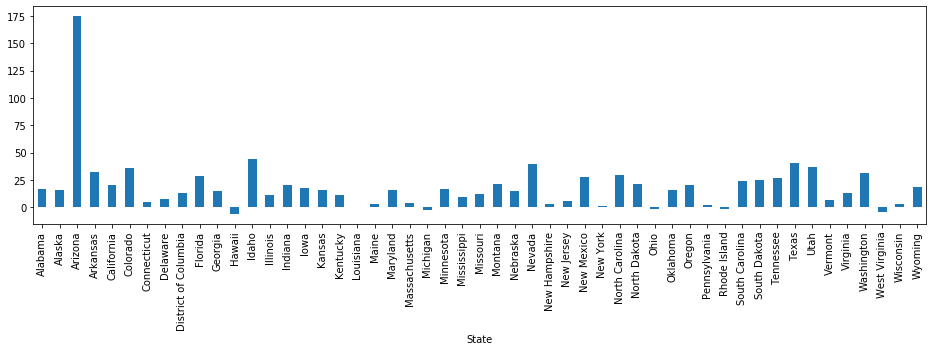

In [10]:
state_growth = usa.groupby('State')['Growth'].mean()
plt.figure(figsize = (16,4))
state_growth.plot(kind = 'bar')
plt.show()

### Plot Fastest Growing Regions
Looks like the Mountain region is the fastest growing. Mountain region includes:
1. Arizona
2. Colorado
3. Idaho
4. Montana
5. New Mexico
6. Nevada
7. Utah
8. Wyoming

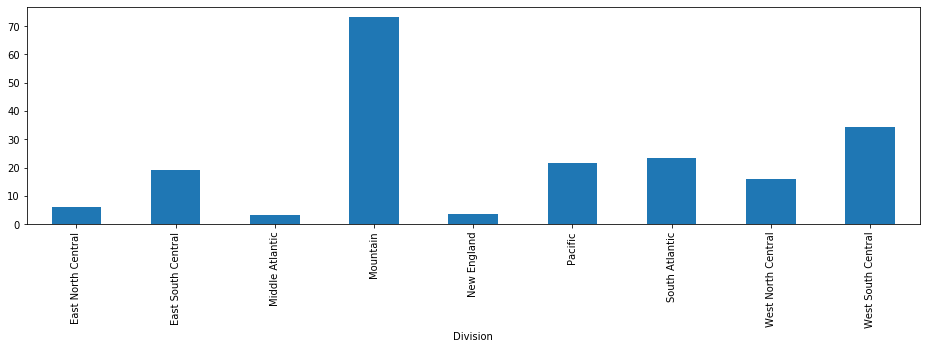

In [11]:
division_growth = usa.groupby('Division')['Growth'].mean()
plt.figure(figsize = (16,4))
division_growth.plot(kind = 'bar')
plt.show()

## Plotting Fastest Growing vs. Most Populous Cities

### Import Necessary Libraries

In [12]:
import folium
from folium import plugins
from geopy.geocoders import Nominatim 
import requests

### Create the USA Map Object

In [13]:
usa_map = folium.Map(location=[37.09, -95.71], zoom_start=4) 

Blue Dots = Most populous cities<br>
Red Dots = Fastest growing cities
- Seems the fastest growing cities tend to be near the most populous cities (too much congestion in the big cities?)

In [26]:
# Plots the most populous cities with blue dots

for lat, lng, label in zip(us_pop['Latitude'], us_pop['Longitude'], us_pop['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(usa_map)  

# Plots the fastest growing cities with red dots

for lat, lng, label in zip(us_growth['Latitude'], us_growth['Longitude'], us_growth['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#cc3131',
        fill_opacity=0.7,
        parse_html=False).add_to(usa_map) 
usa_map

## Using Foursqaure

### Assigning Foursqaure Parameters to Variables

In [15]:
CLIENT_ID = 'GXEXHOWAMC5YBFNFSRPF0BLCKY4UIZSHBCW3QFPYG0TFHKV5' # Foursquare ID
CLIENT_SECRET = 'TUL3YMP3DNJUBCVLEU1U14NHVSQD3SA3124SCARWKBF43SRX' # Foursquare Secret
VERSION = '20200207' # Foursquare API version

### Creating the getNearbyVenues Function
This function will return the results of a Foursqaure API call to get nearby venues

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 20):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Creates the growth_venues Data Frame

In [17]:
growth_venues = getNearbyVenues(names=us_growth['City'],
                                   latitudes=us_growth['Latitude'],
                                   longitudes=us_growth['Longitude'])

Maricopa
Buckeye
Frisco
Lincoln
Surprise
Goodyear
Beaumont
Plainfield
Wylie
Lehi


In [27]:
growth_venues

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Maricopa,33.058106,-112.047642,Honeycutt Coffee,33.058341,-112.044423,Coffee Shop
1,Maricopa,33.058106,-112.047642,Helen's Kitchen,33.053753,-112.048868,American Restaurant
2,Maricopa,33.058106,-112.047642,Domino's Pizza,33.061536,-112.048774,Pizza Place
3,Maricopa,33.058106,-112.047642,Amtrak Maricopa Station,33.056270,-112.048117,Train Station
4,Maricopa,33.058106,-112.047642,Head Quarters,33.058179,-112.048288,American Restaurant
...,...,...,...,...,...,...,...
106,Lehi,40.391617,-111.850766,Thai House,40.387930,-111.853502,Thai Restaurant
107,Lehi,40.391617,-111.850766,Domino's Pizza,40.387779,-111.851021,Pizza Place
108,Lehi,40.391617,-111.850766,SHED BUILDERS,40.393970,-111.852163,Business Service
109,Lehi,40.391617,-111.850766,John Hutchings Museum of Natural History,40.388462,-111.849489,History Museum


### Encoding Venues for Each City

In [19]:
# one hot encoding
growth_onehot = pd.get_dummies(growth_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
growth_onehot['City'] = growth_venues['City'] 

# move city column to the first column
fixed_columns = [growth_onehot.columns[-1]] + list(growth_onehot.columns[:-1])
growth_onehot = growth_onehot[fixed_columns]

growth_onehot

,City,ATM,American Restaurant,Art Gallery,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Board Shop,...,Sandwich Place,Smoke Shop,Sporting Goods Shop,Steakhouse,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Video Store
0,Maricopa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Maricopa,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Maricopa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Maricopa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Maricopa,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Lehi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
107,Lehi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,Lehi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,Lehi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Groups Venue Frequency in each City

In [20]:
growth_grouped = growth_onehot.groupby('City').mean().reset_index()

In [21]:
num_top_venues = 5

for c in growth_grouped['City']:
    print("----"+c+"----")
    temp = growth_grouped[growth_grouped['City'] == c].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beaumont----
                  venue  freq
0  Fast Food Restaurant  0.21
1                 Hotel  0.07
2    Mexican Restaurant  0.07
3          Dessert Shop  0.07
4           Coffee Shop  0.07


----Buckeye----
                venue  freq
0  Mexican Restaurant  0.14
1      Discount Store  0.14
2         Video Store  0.07
3         Gas Station  0.07
4         Coffee Shop  0.07


----Frisco----
                 venue  freq
0   Mexican Restaurant  0.15
1  American Restaurant  0.10
2           Food Truck  0.10
3             Boutique  0.05
4                Diner  0.05


----Goodyear----
                                      venue  freq
0  Residential Building (Apartment / Condo)   0.4
1                           Automotive Shop   0.2
2                              Intersection   0.2
3                                  Bus Stop   0.2
4                        Photography Studio   0.0


----Lehi----
                  venue  freq
0        History Museum  0.14
1           Pizza Place  0.14
2 

### Display Top Venues for Each City

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
growth_venues_sorted = pd.DataFrame(columns=columns)
growth_venues_sorted['City'] = growth_grouped['City']

for ind in np.arange(growth_grouped.shape[0]):
    growth_venues_sorted.iloc[ind, 1:] = return_most_common_venues(growth_grouped.iloc[ind, :], num_top_venues)

growth_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beaumont,Fast Food Restaurant,Bar,Diner,Motel,Fried Chicken Joint,Coffee Shop,Breakfast Spot,Dessert Shop,Mexican Restaurant,Hotel
1,Buckeye,Discount Store,Mexican Restaurant,Video Store,Pizza Place,BBQ Joint,Bank,Business Service,Café,Coffee Shop,Gas Station
2,Frisco,Mexican Restaurant,Food Truck,American Restaurant,Restaurant,Diner,Coffee Shop,Lounge,Music School,Board Shop,Boutique
3,Goodyear,Residential Building (Apartment / Condo),Automotive Shop,Intersection,Bus Stop,Video Store,Chinese Restaurant,Food Truck,Fish & Chips Shop,Fast Food Restaurant,Donut Shop
4,Lehi,Business Service,Park,Thai Restaurant,Gym / Fitness Center,History Museum,Bakery,Pizza Place,Dessert Shop,Coffee Shop,Cosmetics Shop


pandas.core.frame.DataFrame

## Conclusion
This was a challenging, but insightful project into analyzing the fastest growing cities in the U.S. I can easily see, cities in the Mountain region tend to be the fastest growing cities and one of the most popular venues are Mexican Restaurants. This could be due to these cities being close to the Mexico border, so anyone looking to start in this region should think about starting this type of restaurant. It was also interesting to see that the fastest growing cities tended to be located near the most populous cities, which begs the questions: Are those cities becoming too congested? Or are living costs becoming too much to maintain? Either way, this was a fun project to work on and this course definitley taught me a lot. 